<a href="https://colab.research.google.com/github/MateoGlz/Progra-Analitica-Descriptica-Predictiva/blob/main/PracticaRegresionLinealMultiple_MateoGonzalez.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Maestría en Inteligencia Artificial y Analítica de Datos

## Programación para Analítica Descriptiva y Predictiva - Marzo 2025
## Práctica: Práctica: Regresión Lineal Múltiple
---


## Datos del Estudiante

*   Mateo Gonzalez Lopez
*   263881

---



##  Objetivo de aprendizaje
Al finalizar esta práctica, el estudiante será capaz de **aplicar regresión lineal múltiple utilizando Scikit-Learn para modelar la relación entre varias variables independientes y una variable dependiente**, verificar los supuestos del modelo, interpretar los coeficientes, analizar la correlación entre predictores y evaluar el rendimiento del modelo utilizando métricas como el MSE, RMSE y R².

Datos
Trabajarás con el archivo `advertising.csv`, que contiene información sobre el gasto publicitario en diferentes medios y las ventas obtenidas:

-`TV`: inversión en publicidad televisiva.

-`Radio`: inversión en publicidad en radio.

-`Newspaper`: inversión en publicidad en periódicos.

`Sales`: ventas del producto (variable dependiente).

## Parte 1: Carga de datos y bibliotecas
1. Importa las bibliotecas necesarias.
2. Carga el archivo `advertising.csv`.
3. Muestra las primeras filas del dataframe.
4. Describe estadísticamente las variables.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
import numpy as np
ruta = '/content/drive/MyDrive/Colab_Notebooks/advertising.csv'
df = pd.read_csv(ruta)
df.tail()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,TV,Radio,Newspaper,Sales
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5
199,232.1,8.6,8.7,18.4


## Parte 2: Análisis exploratorio de los datos
### 2.1  Análisis de la Relación Lineal entre la variable dependiente y las independientes
1. Grafica dispersión entre cada variable independiente (`TV`, `Radio`, `Newspaper`) y `Sales`. Usa también regplot.
2. Interpreta visualmente la relación entre variables.

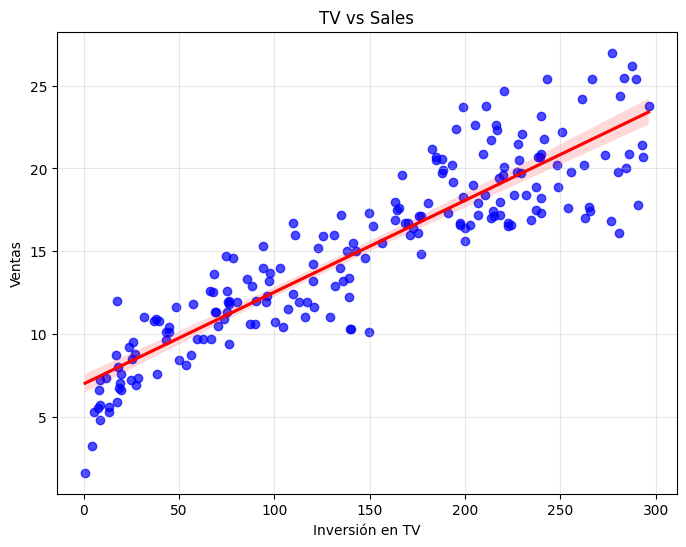

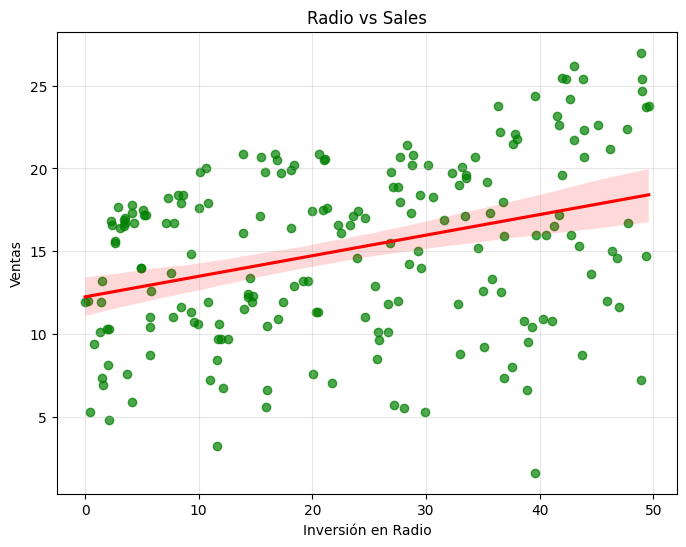

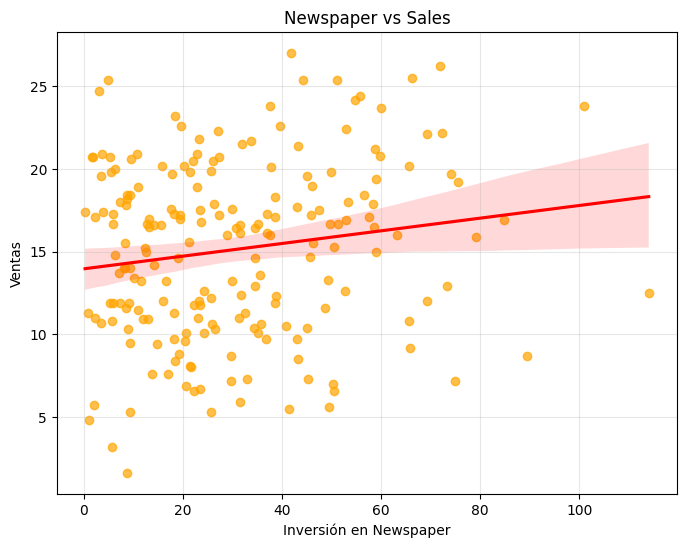

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
plt.scatter(df['TV'], df['Sales'], alpha=0.7, color='blue')
sns.regplot(x='TV', y='Sales', data=df, scatter=False, color='red')
plt.title('TV vs Sales')
plt.xlabel('Inversión en TV')
plt.ylabel('Ventas')
plt.grid(True, alpha=0.3)
plt.show()

plt.figure(figsize=(8, 6))
plt.scatter(df['Radio'], df['Sales'], alpha=0.7, color='green')
sns.regplot(x='Radio', y='Sales', data=df, scatter=False, color='red')
plt.title('Radio vs Sales')
plt.xlabel('Inversión en Radio')
plt.ylabel('Ventas')
plt.grid(True, alpha=0.3)
plt.show()

plt.figure(figsize=(8, 6))
plt.scatter(df['Newspaper'], df['Sales'], alpha=0.7, color='orange')
sns.regplot(x='Newspaper', y='Sales', data=df, scatter=False, color='red')
plt.title('Newspaper vs Sales')
plt.xlabel('Inversión en Newspaper')
plt.ylabel('Ventas')
plt.grid(True, alpha=0.3)
plt.show()

### 2.2: Correlación entre variables
1. Calcula la matriz de correlación.
2. Visualízala con un heatmap.
3. Responde: ¿Qué variables están más correlacionadas con `Sales`? ¿Hay correlación alta entre predictores?

Matriz de Correlación:
                 TV     Radio  Newspaper     Sales
TV         1.000000  0.054809   0.056648  0.901208
Radio      0.054809  1.000000   0.354104  0.349631
Newspaper  0.056648  0.354104   1.000000  0.157960
Sales      0.901208  0.349631   0.157960  1.000000


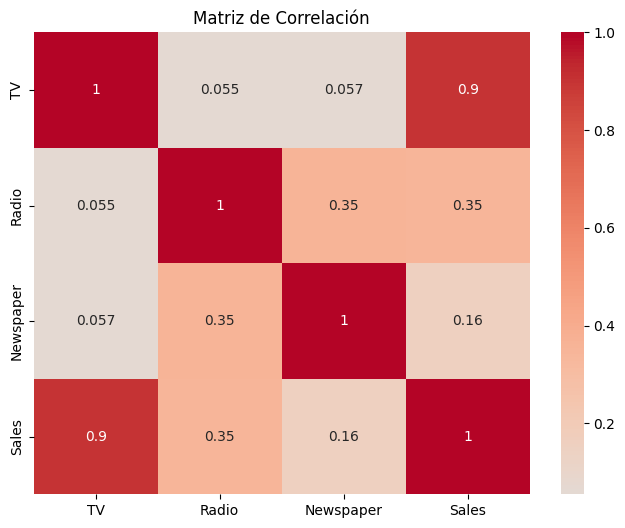

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = df.corr()
print("Matriz de Correlación:")
print(correlation_matrix)

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Matriz de Correlación')
plt.show()

TV tiene una gran relacion con las Ventas siendo basicamente solo ese el unico que contiene el dataset. Los predictores no están correlacionados entre sí, lo que es ideal para el modelo.


## Parte 3. Multicolinealidad
1. Calcula el VIF (Variance Inflation Factor) para cada predictor.
2. Crea un diagrama de barras  para mostrar el  VIF
3. Interpreta si hay multicolinealidad:
- ¿Alguna variable tiene un VIF mayor a 5 o mayor a 10?
- ¿Qué implicaciones tiene esto para el modelo?

VIF para cada predictor:
    Variable       VIF
0         TV  2.486772
1      Radio  3.285462
2  Newspaper  3.055245


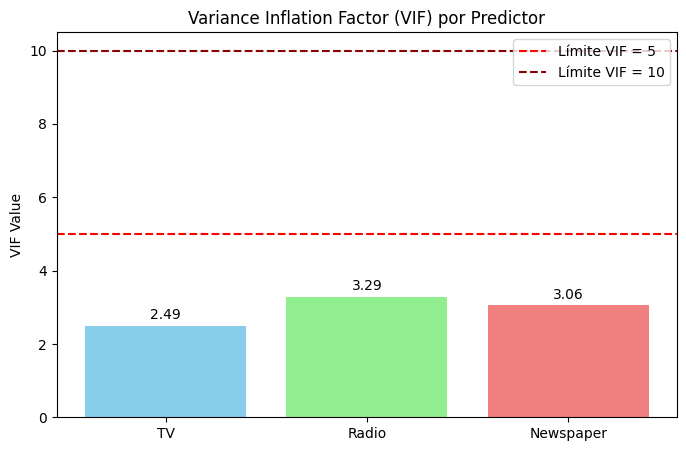

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd
import matplotlib.pyplot as plt

X_vif = df[['TV', 'Radio', 'Newspaper']]

vif_data = pd.DataFrame()
vif_data['Variable'] = X_vif.columns
vif_data['VIF'] = [variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])]

print("VIF para cada predictor:")
print(vif_data)

plt.figure(figsize=(8, 5))
bars = plt.bar(vif_data['Variable'], vif_data['VIF'], color=['skyblue', 'lightgreen', 'lightcoral'])
plt.axhline(y=5, color='red', linestyle='--', label='Límite VIF = 5')
plt.axhline(y=10, color='darkred', linestyle='--', label='Límite VIF = 10')
plt.ylabel('VIF Value')
plt.title('Variance Inflation Factor (VIF) por Predictor')
plt.legend()

for bar, vif in zip(bars, vif_data['VIF']):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.1,
             f'{vif:.2f}', ha='center', va='bottom')

plt.show()

**¿Alguna variable tiene un VIF mayor a 5 o mayor a 10?**
No ninguna.

**¿Qué implicaciones tiene esto para el modelo?**

Que las variables no tienen datos repetidos o escalas similares, lo que hace que el modelo de una vision optima de como cada variable afecta las ventas.

## Parte 4: Construcción del Modelo (Todas las variables Independientes), Evaluación

### 4.1 Entrenamiento del Modelo (Todas las Variables Independientes)

1. Entrena un modelo de regresión lineal múltiple usando TV, Radio y Newspaper como variables independientes.
2. Imprime el intercepto y los coeficientes del modelo.
3. Interpreta cada uno:
¿Qué significa cada uno de los coeficientes  en términos de ventas?

In [ ]:
from sklearn.linear_model import LinearRegression

X = df[['TV', 'Radio', 'Newspaper']]
y = df['Sales']

modelo_multiple = LinearRegression()
modelo_multiple.fit(X, y)

intercepto = modelo_multiple.intercept_
coeficientes = modelo_multiple.coef_

print("=== MODELO DE REGRESIÓN MÚLTIPLE ===")
print(f"Intercepto: {intercepto:.4f}")
print("\nCoeficientes:")
for i, col in enumerate(X.columns):
    print(f"  {col}: {coeficientes[i]:.4f}")

print(f"\n ECUACIÓN DEL MODELO:")
print(f"Ventas = {intercepto:.4f} + {coeficientes[0]:.4f}×TV + {coeficientes[1]:.4f}×Radio + {coeficientes[2]:.4f}×Newspaper")

=== MODELO DE REGRESIÓN MÚLTIPLE ===
Intercepto: 4.6251

Coeficientes:
  TV: 0.0544
  Radio: 0.1070
  Newspaper: 0.0003

 ECUACIÓN DEL MODELO:
Ventas = 4.6251 + 0.0544×TV + 0.1070×Radio + 0.0003×Newspaper


**Interpreta cada uno: ¿Qué significa cada uno de los coeficientes en términos de ventas?**

Significa que el mas rentable es la Radio seguido de la TV y Newspaper es insignificante se tendria que dejar de invertir dinero.

### 4.2 Normalidad de los residuos

1. Calcula los residuos: residuos = y - y_pred.

2. Grafica un histograma con KDE de los residuos.

3. ¿Los residuos parecen distribuirse normalmente?

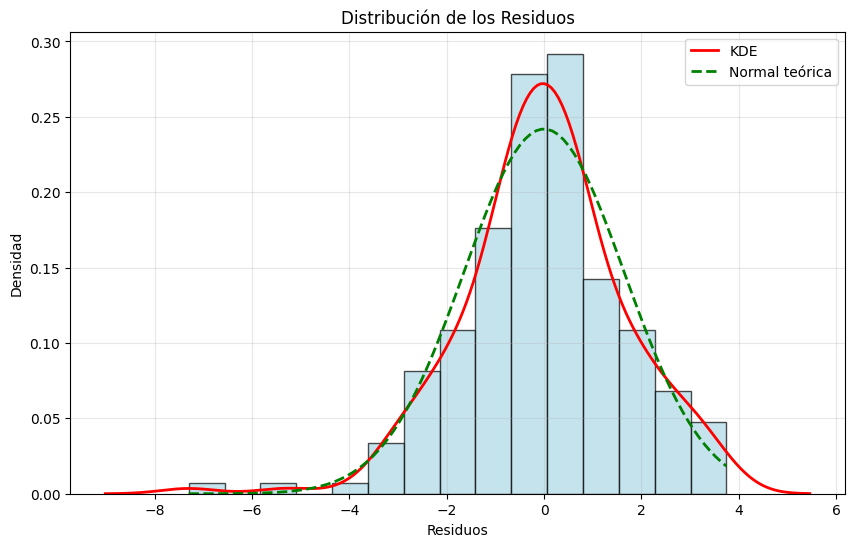

Prueba de Shapiro-Wilk: p-value = 0.0016
 Los residuos NO siguen una distribución normal


In [ ]:
y_pred = modelo_multiple.predict(X)
residuos = y - y_pred

import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import numpy as np

plt.figure(figsize=(10, 6))
plt.hist(residuos, bins=15, density=True, alpha=0.7, color='lightblue', edgecolor='black')
sns.kdeplot(residuos, color='red', linewidth=2, label='KDE')

x_norm = np.linspace(residuos.min(), residuos.max(), 100)
y_norm = stats.norm.pdf(x_norm, residuos.mean(), residuos.std())
plt.plot(x_norm, y_norm, 'g--', linewidth=2, label='Normal teórica')

plt.title('Distribución de los Residuos')
plt.xlabel('Residuos')
plt.ylabel('Densidad')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

shapiro_stat, shapiro_p = stats.shapiro(residuos)
print(f"Prueba de Shapiro-Wilk: p-value = {shapiro_p:.4f}")

if shapiro_p > 0.05:
    print(" Los residuos siguen una distribución normal")
else:
    print(" Los residuos NO siguen una distribución normal")

La distribucion no es normal, algo parecida pero no.

### 4.3. Homocedasticidad

1. Grafica los residuos contra los valores predichos.
2. ¿Observas patrones? ¿Los residuos se dispersan aleatoriamente?

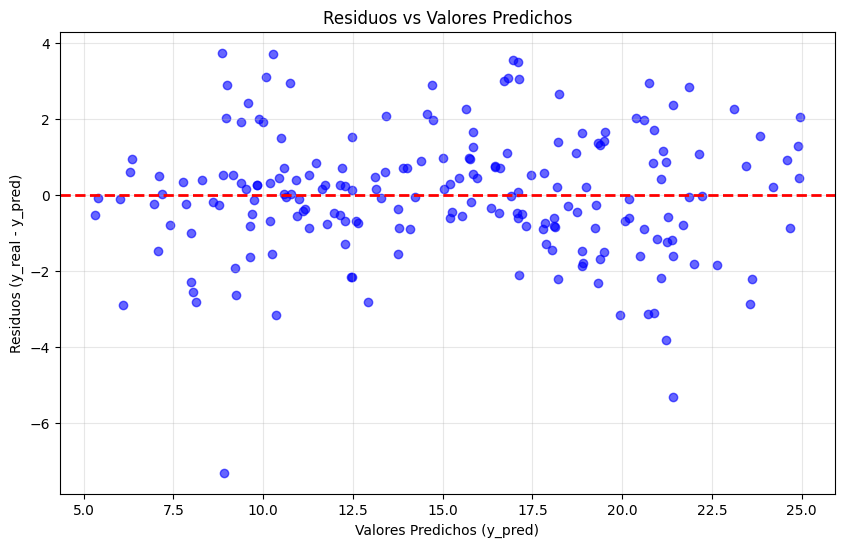

In [ ]:
import matplotlib.pyplot as plt

y_pred = modelo_multiple.predict(X)
residuos = y - y_pred

plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuos, alpha=0.6, color='blue')
plt.axhline(y=0, color='red', linestyle='--', linewidth=2)
plt.title('Residuos vs Valores Predichos')
plt.xlabel('Valores Predichos (y_pred)')
plt.ylabel('Residuos (y_real - y_pred)')
plt.grid(True, alpha=0.3)
plt.show()

Parece que tiene un patron pero tiene una distribucion aleatoria.

### 4.4 Q-Q Plot

1. Graficar el Q-Q Plot
2. Interpreta el gráfico:

a) Si los puntos se alinean aproximadamente sobre la línea diagonal, los residuos siguen una distribución normal

b) Desviaciones sistemáticas indican asimetría o colas pesadas.

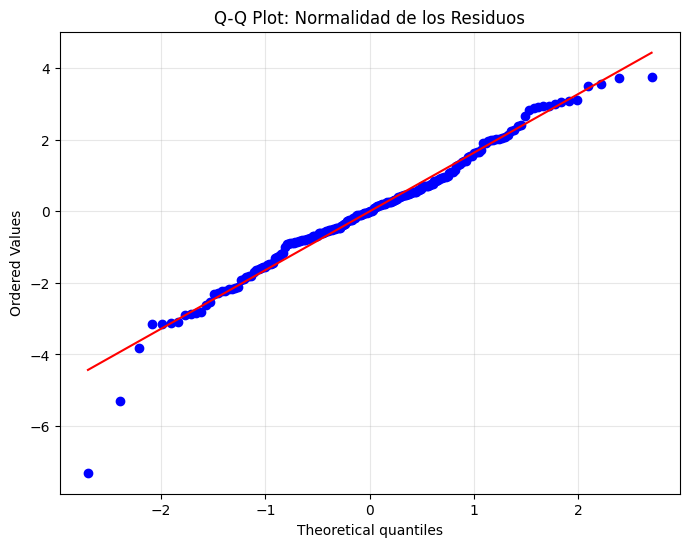

In [ ]:
import matplotlib.pyplot as plt
from scipy import stats

y_pred = modelo_multiple.predict(X)
residuos = y - y_pred

plt.figure(figsize=(8, 6))
stats.probplot(residuos, dist="norm", plot=plt)
plt.title('Q-Q Plot: Normalidad de los Residuos')
plt.grid(True, alpha=0.3)
plt.show()

En general siguen una linea pero en los extremos tiene una cola pesada.

### 4.5. Evaluación del Modelo

1. Calcula las métricas: a) MSE (error cuadrático medio), b) RMSE (raíz del error cuadrático medio), c) R² (coeficiente de determinación)

2. ¿Qué nos dicen estas métricas sobre el ajuste del modelo?


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

y_pred = modelo_multiple.predict(X)

mse = mean_squared_error(y, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y, y_pred)

print("=== MÉTRICAS DEL MODELO ===")
print(f"a) MSE (Error Cuadrático Medio): {mse:.4f}")
print(f"b) RMSE (Raíz del Error Cuadrático Medio): {rmse:.4f}")
print(f"c) R² (Coeficiente de Determinación): {r2:.4f}")

=== MÉTRICAS DEL MODELO ===
a) MSE (Error Cuadrático Medio): 2.7060
b) RMSE (Raíz del Error Cuadrático Medio): 1.6450
c) R² (Coeficiente de Determinación): 0.9026


In [ ]:
print(" RANGO DE GANANCIAS REALES:")
print(f"Ganancia mínima: {df['Sales'].min():.2f}")
print(f"Ganancia máxima: {df['Sales'].max():.2f}")
print(f"Ganancia promedio: {df['Sales'].mean():.2f}")

 RANGO DE GANANCIAS REALES:
Ganancia mínima: 1.60
Ganancia máxima: 27.00
Ganancia promedio: 15.13


Explica el 90.26% de la variacion de las ventas solo tiene una desviacion de la prediccion de las ventas de ±1.645 donde el rango es de 25.4.

### 4.6. Visualización de Predicciones

1. Crea un gráfico comparando Sales reales vs Sales predichas.

2. Puedes usar plt.scatter(y_true, y_pred) para evaluar visualmente el ajuste.

3.¿Qué observas?¿Qué observas? ¿Qué información puedes obtener de esta gráfica?

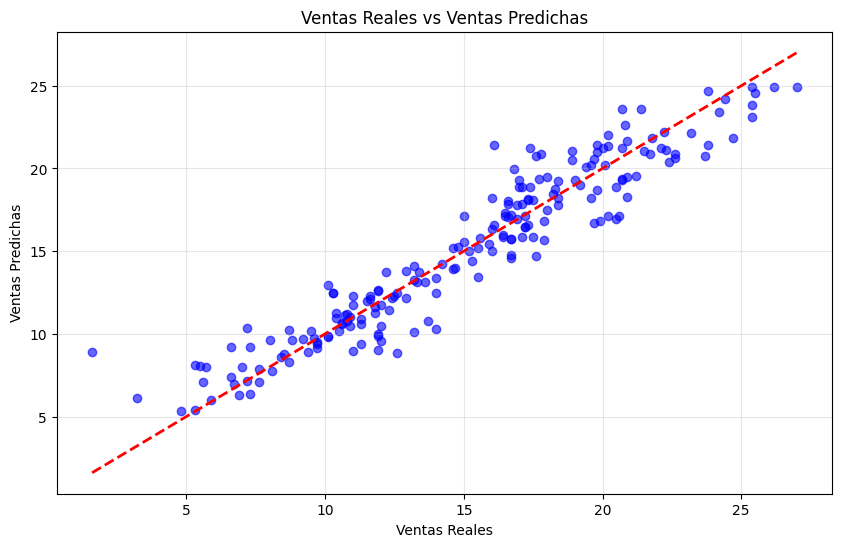

In [ ]:
import matplotlib.pyplot as plt

y_pred = modelo_multiple.predict(X)

plt.figure(figsize=(10, 6))
plt.scatter(y, y_pred, alpha=0.6, color='blue')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'red', linestyle='--', linewidth=2)
plt.title('Ventas Reales vs Ventas Predichas')
plt.xlabel('Ventas Reales')
plt.ylabel('Ventas Predichas')
plt.grid(True, alpha=0.3)
plt.show()

Como se vio con R² (Coeficiente de Determinación), se ve que Casi todos estan en el punto de la prediccion ideal auqnue viendo que tiende a subestimar las ventas.

### 4.7 Verificar el impacto de los atributos en el modelo

1. Ajusta el modelo usando statsmodels en lugar de scikit-learn para obtener los valores p.
2. Interpreta los resultados:

 - Observa los valores P>|t| en la tabla de salida.

 - ¿Qué variables tienen p-value menores a 0.05?

 - ¿Cuál es la conclusión sobre esas variables?


In [ ]:
import statsmodels.api as sm

X_sm = sm.add_constant(X)

modelo_sm = sm.OLS(y, X_sm).fit()

print(modelo_sm.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.901
Method:                 Least Squares   F-statistic:                     605.4
Date:                Fri, 17 Oct 2025   Prob (F-statistic):           8.13e-99
Time:                        19:21:32   Log-Likelihood:                -383.34
No. Observations:                 200   AIC:                             774.7
Df Residuals:                     196   BIC:                             787.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.6251      0.308     15.041      0.0

Variables con menores de p-value a 0.05 son TV y Radio.

NewsPaper es insignificante no influye asi que se puede eliminar esa estrategia, ademas la que mayor influye a las ventas es la Radio es el mejor coste beneficio.



##Parte 5:  Construcción del Modelo (sin Multicolinealidad), Evaluación

En el caso de que hayas detectado variables con multicolinealidad. Elimina aquellas que presenten esta característica y realiza los mismos pasos **que la parte 4.**
Escribe cada una de las subsecciones similares a las existentes en la Parte 4.

No me sucedio


## Parte 6: Construcción del Modelo (sin variables que no muestran una relación lineal), Evaluación

En el caso de que hayas detectado variables sin una relación lineal con la variable dependiente. Elimina aquellas que presenten esta característica y realiza lo siguiente.

En el caso de que hayas detectado variables sin una relación lineal. Elimina aquellas que presenten esta característica y realiza los mismos pasos **que la parte 4.**
Escribe cada una de las subsecciones similares a las existentes en la Parte 4.

## Parte 4: Construcción del Modelo (Todas las variables Independientes), Evaluación

### 4.1 Entrenamiento del Modelo (Todas las Variables Independientes)

1. Entrena un modelo de regresión lineal múltiple usando TV, Radio y Newspaper como variables independientes.
2. Imprime el intercepto y los coeficientes del modelo.
3. Interpreta cada uno:
¿Qué significa cada uno de los coeficientes  en términos de ventas?

In [ ]:
from sklearn.linear_model import LinearRegression

X_optimizado = df[['TV', 'Radio']]
y = df['Sales']

modelo_multiple = LinearRegression()
modelo_multiple.fit(X_optimizado, y)

intercepto = modelo_multiple.intercept_
coeficientes = modelo_multiple.coef_

print("=== MODELO DE REGRESIÓN MÚLTIPLE ===")
print(f"Intercepto: {intercepto:.4f}")
print("\nCoeficientes:")
for i, col in enumerate(X_optimizado.columns):
    print(f"  {col}: {coeficientes[i]:.4f}")

print(f"\n ECUACIÓN DEL MODELO:")
print(f"Ventas = {intercepto:.4f} + {coeficientes[0]:.4f}×TV + {coeficientes[1]:.4f}×Radio")

=== MODELO DE REGRESIÓN MÚLTIPLE ===
Intercepto: 4.6309

Coeficientes:
  TV: 0.0544
  Radio: 0.1072

 ECUACIÓN DEL MODELO:
Ventas = 4.6309 + 0.0544×TV + 0.1072×Radio


**Valores anteriores**

=== MODELO DE REGRESIÓN MÚLTIPLE ===

Intercepto: 4.6251

Coeficientes:

  TV: 0.0544
  Radio: 0.1070
  Newspaper: 0.0003

 ECUACIÓN DEL MODELO:

Ventas = 4.6251 + 0.0544×TV + 0.1070×Radio + 0.0003×Newspaper

### 4.2 Normalidad de los residuos

1. Calcula los residuos: residuos = y - y_pred.

2. Grafica un histograma con KDE de los residuos.

3. ¿Los residuos parecen distribuirse normalmente?



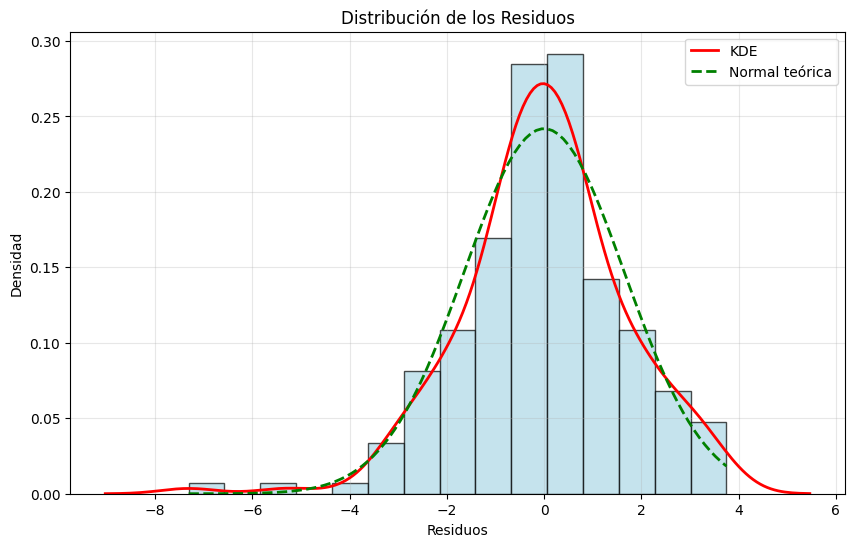

Prueba de Shapiro-Wilk: p-value = 0.0015
 Los residuos NO siguen una distribución normal


In [ ]:
y_pred = modelo_multiple.predict(X_optimizado)
residuos = y - y_pred

import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import numpy as np

plt.figure(figsize=(10, 6))
plt.hist(residuos, bins=15, density=True, alpha=0.7, color='lightblue', edgecolor='black')
sns.kdeplot(residuos, color='red', linewidth=2, label='KDE')

x_norm = np.linspace(residuos.min(), residuos.max(), 100)
y_norm = stats.norm.pdf(x_norm, residuos.mean(), residuos.std())
plt.plot(x_norm, y_norm, 'g--', linewidth=2, label='Normal teórica')

plt.title('Distribución de los Residuos')
plt.xlabel('Residuos')
plt.ylabel('Densidad')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

shapiro_stat, shapiro_p = stats.shapiro(residuos)
print(f"Prueba de Shapiro-Wilk: p-value = {shapiro_p:.4f}")

if shapiro_p > 0.05:
    print(" Los residuos siguen una distribución normal")
else:
    print(" Los residuos NO siguen una distribución normal")

***Grafico Anterior***

Prueba de Shapiro-Wilk: p-value = 0.0016
 Los residuos NO siguen una distribución normal

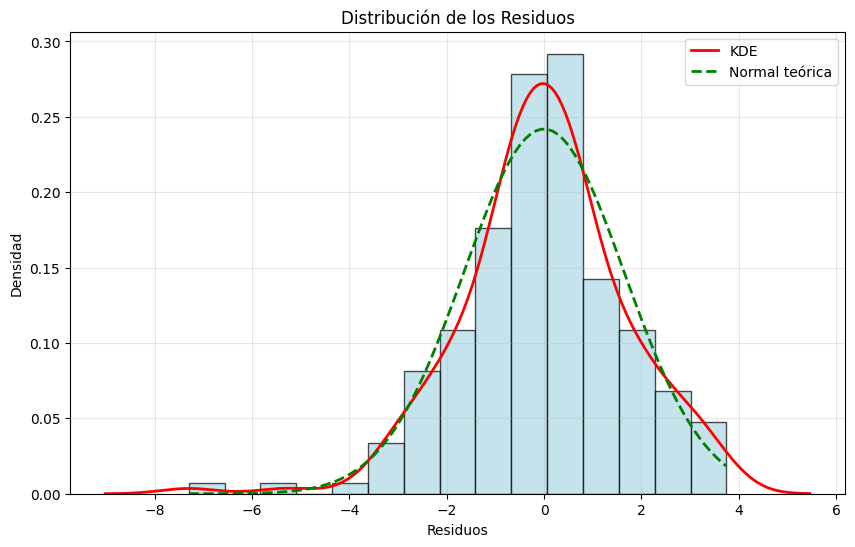

**Son mas normales pero nada significativo.**

**Resultados anteriores**

Prueba de Shapiro-Wilk: p-value = 0.0016
 Los residuos NO siguen una distribución normal

### 4.3. Homocedasticidad

1. Grafica los residuos contra los valores predichos.
2. ¿Observas patrones? ¿Los residuos se dispersan aleatoriamente?

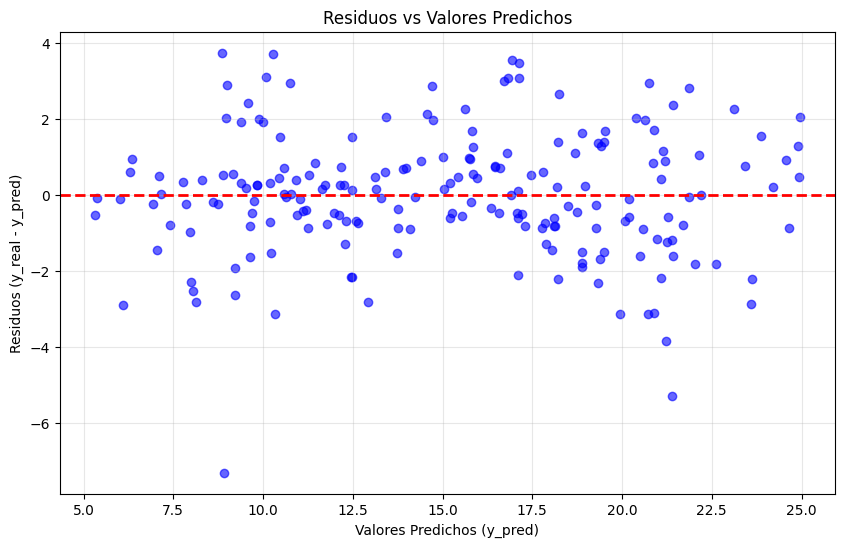

In [ ]:
import matplotlib.pyplot as plt

y_pred = modelo_multiple.predict(X_optimizado)
residuos = y - y_pred

plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuos, alpha=0.6, color='blue')
plt.axhline(y=0, color='red', linestyle='--', linewidth=2)
plt.title('Residuos vs Valores Predichos')
plt.xlabel('Valores Predichos (y_pred)')
plt.ylabel('Residuos (y_real - y_pred)')
plt.grid(True, alpha=0.3)
plt.show()

***Grafico Interior***

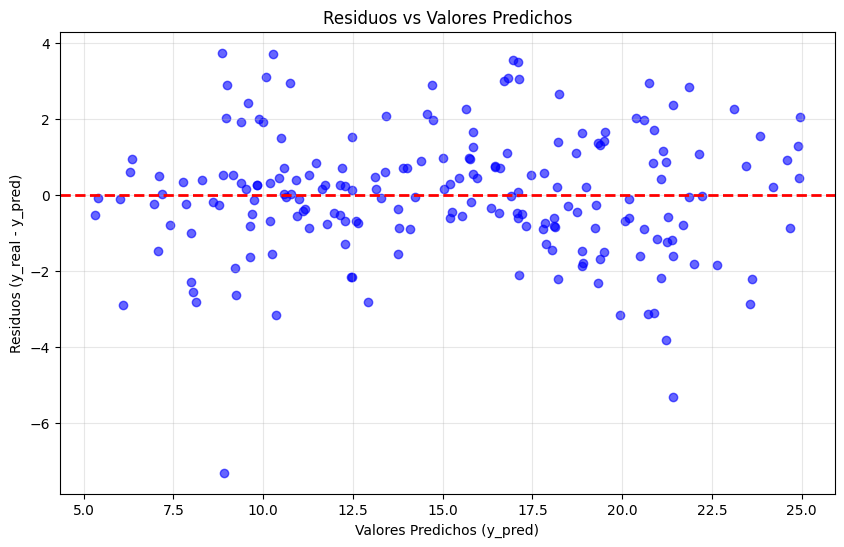

**Tampoco veo alguna diferencia**

### 4.4 Q-Q Plot

1. Graficar el Q-Q Plot
2. Interpreta el gráfico:

a) Si los puntos se alinean aproximadamente sobre la línea diagonal, los residuos siguen una distribución normal

b) Desviaciones sistemáticas indican asimetría o colas pesadas.



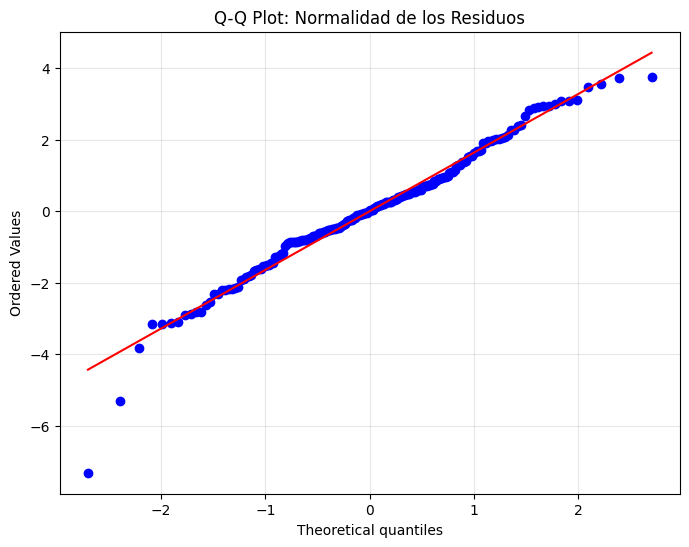

In [ ]:
import matplotlib.pyplot as plt
from scipy import stats

y_pred = modelo_multiple.predict(X_optimizado)
residuos = y - y_pred

plt.figure(figsize=(8, 6))
stats.probplot(residuos, dist="norm", plot=plt)
plt.title('Q-Q Plot: Normalidad de los Residuos')
plt.grid(True, alpha=0.3)
plt.show()

***Grafico Anterior***

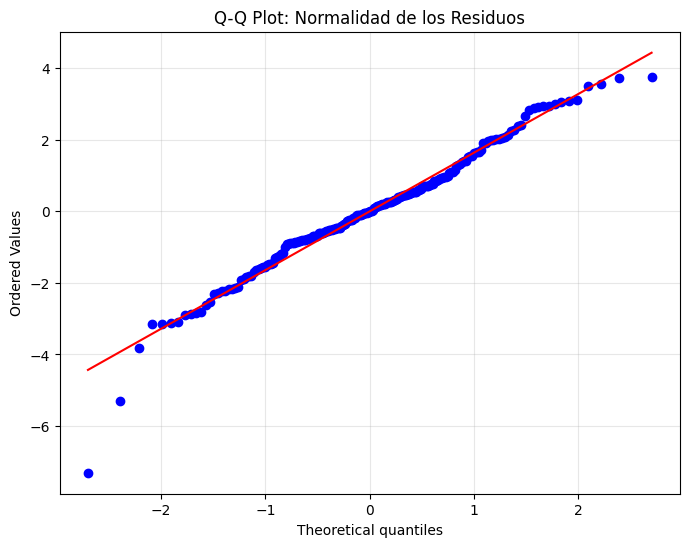

**Tampoco veo alguna diferencia**

### 4.6. Visualización de Predicciones

1. Crea un gráfico comparando Sales reales vs Sales predichas.

2. Puedes usar plt.scatter(y_true, y_pred) para evaluar visualmente el ajuste.

3.¿Qué observas?¿Qué observas? ¿Qué información puedes obtener de esta gráfica?



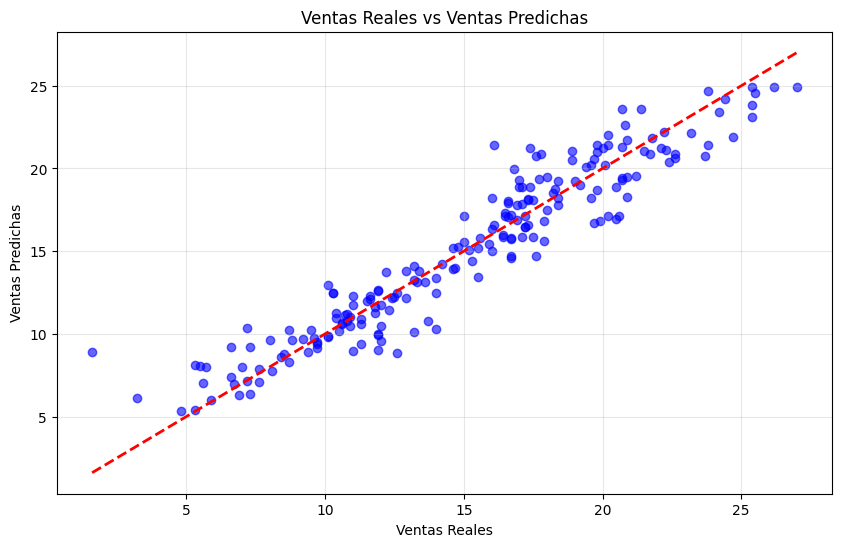

In [ ]:
import matplotlib.pyplot as plt

y_pred = modelo_multiple.predict(X_optimizado)

plt.figure(figsize=(10, 6))
plt.scatter(y, y_pred, alpha=0.6, color='blue')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'red', linestyle='--', linewidth=2)
plt.title('Ventas Reales vs Ventas Predichas')
plt.xlabel('Ventas Reales')
plt.ylabel('Ventas Predichas')
plt.grid(True, alpha=0.3)
plt.show()

**Grafico Anterior**

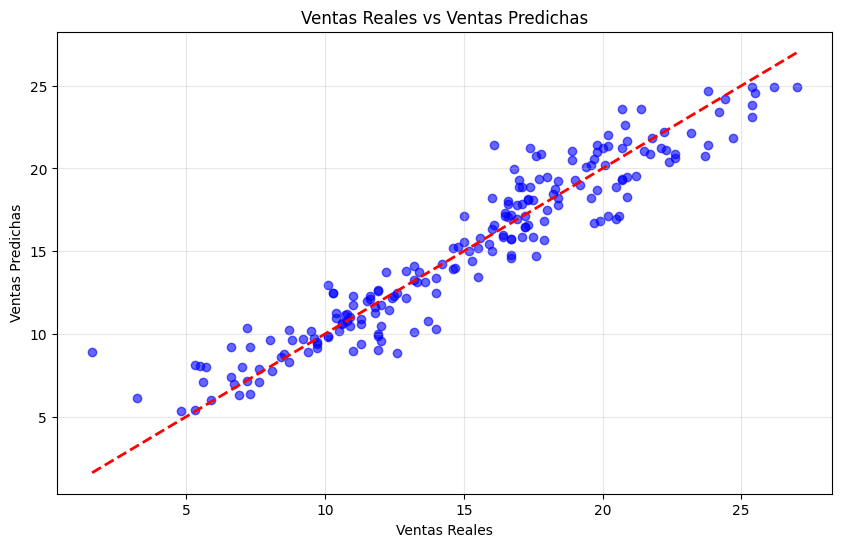

**No veo alguna diferencia.**

### 4.7 Verificar el impacto de los atributos en el modelo

1. Ajusta el modelo usando statsmodels en lugar de scikit-learn para obtener los valores p.
2. Interpreta los resultados:

 - Observa los valores P>|t| en la tabla de salida.

 - ¿Qué variables tienen p-value menores a 0.05?

 - ¿Cuál es la conclusión sobre esas variables?



In [ ]:
import statsmodels.api as sm

X_sm = sm.add_constant(X_optimizado)

modelo_sm = sm.OLS(y, X_sm).fit()

print(modelo_sm.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.902
Method:                 Least Squares   F-statistic:                     912.7
Date:                Fri, 17 Oct 2025   Prob (F-statistic):          2.39e-100
Time:                        19:21:33   Log-Likelihood:                -383.34
No. Observations:                 200   AIC:                             772.7
Df Residuals:                     197   BIC:                             782.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.6309      0.290     15.952      0.0

**Resultado Anterior**

coef    std err          t      P>|t|      [0.025      0.975]

const          4.6251      0.308     15.041      0.000       4.019       5.232

TV             0.0544      0.001     39.592      0.000       0.052       0.057

Radio          0.1070      0.008     12.604      0.000       0.090       0.124

Newspaper      0.0003      0.006      0.058      0.954      -0.011       0.012

**Solo el valor de T mejoro, que se nota en radio es aun 7.3% mas importante de lo que se veia antes.**

##7. Conclusiones.

¿Cuál de los tres modelos construidos fue el mejor?
¿Cuál fue el atributo que mas influencia tiene en las ventas?

El mejor fue cuando se elimino el NewsPaper, el que mayor influencia tiene es la TV pero el que es mas redituable es Radio